In [53]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import os

In [6]:
df = pd.read_csv("Reviews.csv")
df = df[:10000]

# Part 1

## 第一題

In [3]:
df.drop(['Id','ProductId','HelpfulnessNumerator',
         'HelpfulnessDenominator','Time','Summary','Text'],axis = 1, inplace=True)
by_id = df.groupby(["UserId","ProfileName"])
count_df = by_id.count() 
mean_df = by_id.mean()
count_df.rename(columns={'Score':'Score count'},inplace=True)
mean_df.rename(columns={'Score':'Score mean'},inplace=True)
combine = pd.concat([count_df,mean_df],axis=1)
combine.sort_values(by='Score count',inplace=True,ascending=False)
combine.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


## 第二題

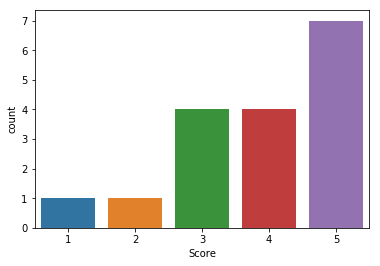

In [13]:
small = df[df['UserId']=='A1Z54EM24Y40LL']
sns.countplot(x="Score", data=small)

## 第三題

Text(0.5, 0, 'Review year')

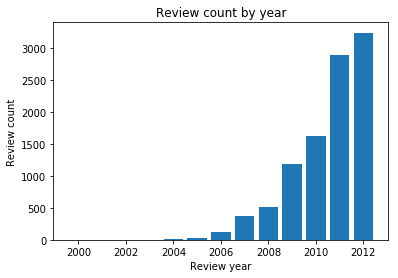

In [78]:
from datetime import datetime

def toDate(time):
    dt = datetime.fromtimestamp(time)
    return dt.strftime('%Y-%m-%d')
def saveYear(date):
    return date.split('-')[0]
series_date = df['Time'].apply(toDate)
series_sortDate = series_date.sort_values()
series_Year = series_sortDate.apply(saveYear)
series_yearCount = series_Year.value_counts()
series_yearCount = series_yearCount.sort_values()
x = [dt.datetime.strptime(d,'%Y').date() for d in series_yearCount.index]
y = series_yearCount.values
fig, ax = plt.subplots()
ax.bar(x,y,width=300)
ax.set_title('Review count by year')
ax.set_ylabel('Review count')
ax.set_xlabel('Review year')

Text(0.5, 0, 'Date')

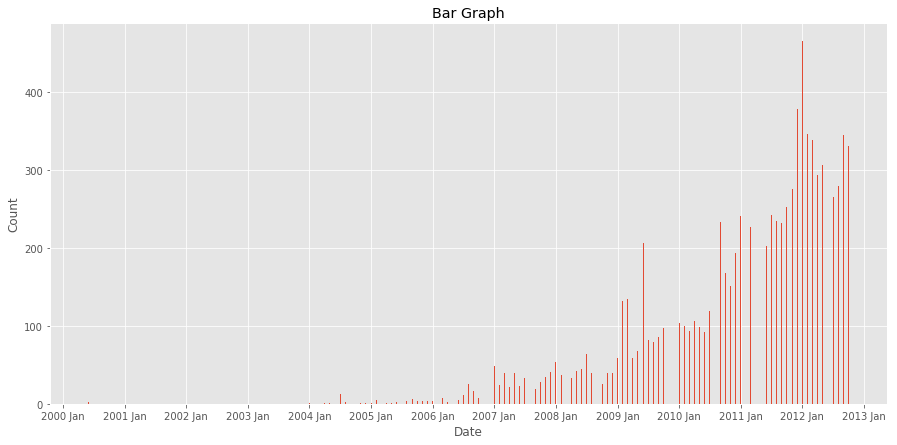

In [132]:
#set ggplot styleB
plt.style.use('ggplot')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x,y,width=5)

#set ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  #mdates.DateFormatter use `strftime` format string

ax.set_title('Bar Graph')
ax.set_ylabel('Count')
ax.set_xlabel('Date')

## 第四題

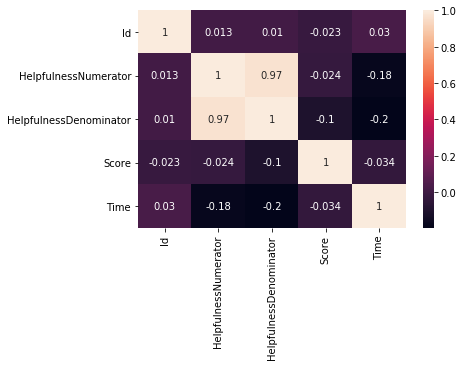

In [14]:
df_all = pd.read_csv("Reviews.csv")
df_all = df_all[:10000]
sns.heatmap(data=df_all.corr(),annot=True)

## 第五題

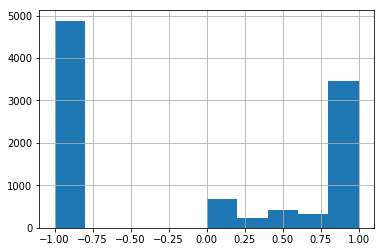

In [7]:
def percent(Numerator,Denominator):
    if Numerator > Denominator:
        return -1
    elif Denominator == 0:
        return -1
    else:
        return Numerator / Denominator
# df['HelpfulnessNumerator'] = df[['HelpfulnessNumerator','HelpfulnessDenominator']].apply(percent)
df['new_column'] = np.vectorize(percent)(df['HelpfulnessNumerator'], df['HelpfulnessDenominator'])
# np.vectorize(fx)(df['A'], df['B'])
df['new_column'].hist()

# Part 2